In [1]:
!pip install tweepy
!pip install ibm_watson

In [3]:
# Import os to work with the operating system
import os 

# Import tweepy to work with the twitter API
import tweepy as tw

# Import pandas to work with dataframes
import pandas as pd

from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
consumer_key = 'Adj8P3OkoGkGhsdyvC9bbVkfA'
consumer_secret = 'ph3eKRrC8mhHibq9YjCeZNPqmVfCpq6XOSKSl8PbVvFsJUi56M'
access_token = '1432060098063503361-VwpOL20vaesaKqxK8lntqWdOyaoVRl'
access_token_secret = 'TK9MoAolUJb8jYQqvA4HzAJZv0rBheJ6MF3UGRzfvBYeq'

In [5]:
# Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)

In [21]:
handle = 'TiffanyHaddish'
posts = api.user_timeline(screen_name=handle, count=200, tweet_mode = "extended")

In [22]:
i=1
print("5 Recent tweets")
for tweet in posts[0:5]:
    print(str(i)+') '+tweet.full_text)
    i+=1

5 Recent tweets
1) RT @J0hntavius: WE OUTSIDE FOR NICKIIII BIIIITCHH!!! https://t.co/45r4Rnl8Pb
2) They invented What??? https://t.co/Wb4RK2zJnu via @YouTube
3) #NewProfilePic https://t.co/cz0d8qLwAu
4) Check out my spread in ⁦@Cosmopolitan⁩ magazine. I Kinda Love it.  https://t.co/gvA4xfbfcl
5) New episode of Tuca &amp; Bertie airing on @AdultSwim tonight and on @HBOMax tomorrow. Are you all caught up on Season 3 #sheready https://t.co/uC3c8SC20x


In [25]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])
df.head()

,Tweets
0,RT @J0hntavius: WE OUTSIDE FOR NICKIIII BIIIIT...
1,They invented What??? https://t.co/Wb4RK2zJnu ...
2,#NewProfilePic https://t.co/cz0d8qLwAu
3,Check out my spread in ⁦@Cosmopolitan⁩ magazin...
4,New episode of Tuca &amp; Bertie airing on @Ad...


In [26]:
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', ' ', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    return text
df['Tweets'] = df['Tweets'].apply(cleanText)
df

,Tweets
0,: WE OUTSIDE FOR NICKIIII BIIIITCHH!!!
1,They invented What??? via
2,NewProfilePic
3,Check out my spread in ⁦⁩ magazine. I Kinda Lo...
4,New episode of Tuca &amp; Bertie airing on to...
...,...
195,Happy Birthday Danny Devito! I am Glad God mad...
196,‘The Afterparty’ at Apple TV Plus Gets January...
197,Barbara Carlyle's Cougar Chronicles Ep. 2 : Si...
198,Pop-A-Shot 3.0? Startup Readies At-Home Basket...


In [28]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df

,Tweets,Subjectivity,Polarity
0,: WE OUTSIDE FOR NICKIIII BIIIITCHH!!!,0.050000,0.000000
1,They invented What??? via,0.000000,0.000000
2,NewProfilePic,0.000000,0.000000
3,Check out my spread in ⁦⁩ magazine. I Kinda Lo...,0.600000,0.500000
4,New episode of Tuca &amp; Bertie airing on to...,0.454545,0.136364
...,...,...,...
195,Happy Birthday Danny Devito! I am Glad God mad...,0.818182,0.545455
196,‘The Afterparty’ at Apple TV Plus Gets January...,0.000000,0.000000
197,Barbara Carlyle's Cougar Chronicles Ep. 2 : Si...,0.000000,0.000000
198,Pop-A-Shot 3.0? Startup Readies At-Home Basket...,0.400000,-0.400000


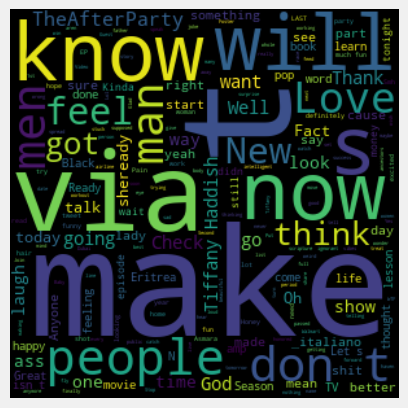

In [30]:
allWords = ' '.join([tweet for tweet in df['Tweets']])
wordCloud = WordCloud(width = 300, height = 300, random_state = 22, max_font_size = 120).generate(allWords)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [31]:
def getAnalysis(score):
    if score>0:
        return 'Positive'
    if score<0:
        return 'Negative'
    else:
        return 'Neutral'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,: WE OUTSIDE FOR NICKIIII BIIIITCHH!!!,0.050000,0.000000,Neutral
1,They invented What??? via,0.000000,0.000000,Neutral
2,NewProfilePic,0.000000,0.000000,Neutral
3,Check out my spread in ⁦⁩ magazine. I Kinda Lo...,0.600000,0.500000,Positive
4,New episode of Tuca &amp; Bertie airing on to...,0.454545,0.136364,Positive
...,...,...,...,...
195,Happy Birthday Danny Devito! I am Glad God mad...,0.818182,0.545455,Positive
196,‘The Afterparty’ at Apple TV Plus Gets January...,0.000000,0.000000,Neutral
197,Barbara Carlyle's Cougar Chronicles Ep. 2 : Si...,0.000000,0.000000,Neutral
198,Pop-A-Shot 3.0? Startup Readies At-Home Basket...,0.400000,-0.400000,Negative


In [36]:
j = 1
sortedDf = df.sort_values(by = ['Polarity'], ascending = False)
for i in range(sortedDf.shape[0]):
    if sortedDf['Analysis'][i] == 'Negative':
        print(str(j)+')'+sortedDf['Tweets'][i])
        j+=1

1)I am tired 🥱 of complaining and asking people to do their job. I am just going to start firing them. No more questions. I am not mean, I just mean what I say.
2)I STILL GOT A FEW BOTTLES 😁 
3)  I am getting weird? I am the same you just in your feelings, so I come off weird to you cause your feelings got you confused. You “sit down” and figure out your feelings. God put me here for a reason and I am doing my assignment. Go do yours.👋🏾✌🏾🕊
4)“By their fruits you shall know them.”What that means to me is, What did they get done, what did they accomplish? That is what makes me move. What have you done lately? When men say “nothing” I get dry. Get your lazy ass off my line and go Teach your kids or get something done!!
5) If your voice sounded the way it does now then, they thought you would be  the 1st Black reporter on the news in your city.
6)You sent those emails to the wrong place. 
7) Thank You she stay wet in the ocean!
8)   She nasty! But healthy!  sheready!
9) You sure they took 

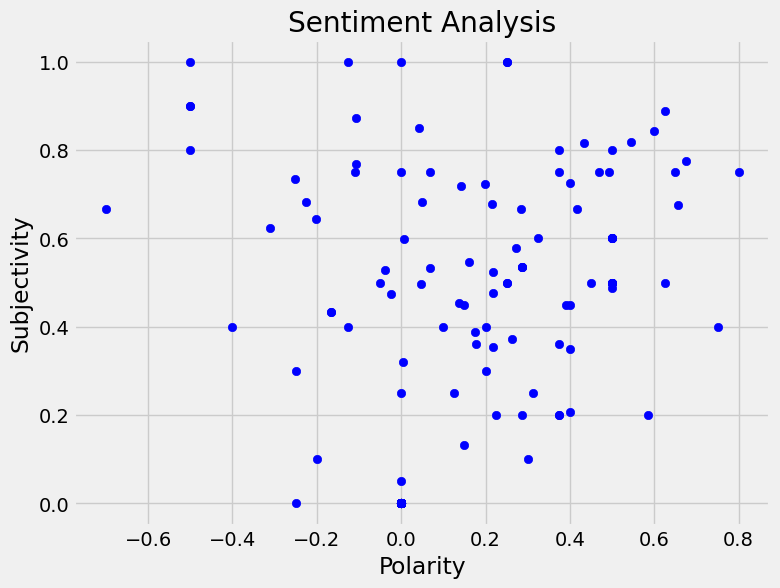

In [37]:
plt.figure(figsize = (8,6))
for i in range(df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [41]:
nTweets = df[df.Analysis == 'Negative']
nTweets = nTweets['Tweets']
round((nTweets.shape[0] / df.shape[0]) * 100, 1)

11.5

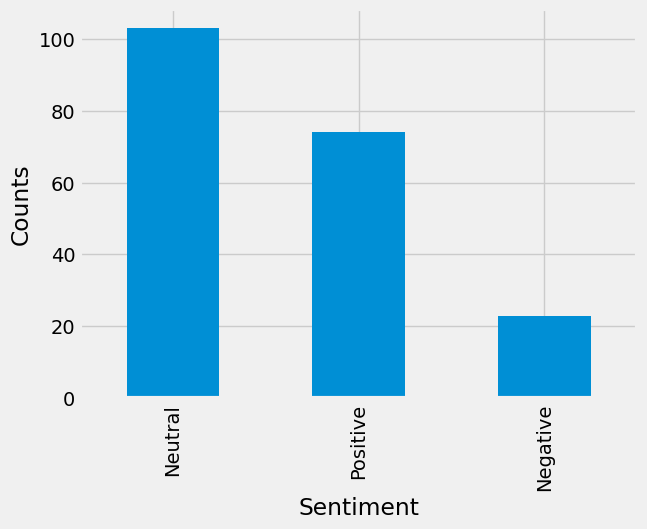

In [45]:
df['Analysis'].value_counts()
plt.title = 'Sentiment Analysis'
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()